<a href="https://colab.research.google.com/github/Hariharan-Vengadasubramanian/ML-Hackathon/blob/main/Hackathon_2_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective - Build a Model to predict Employee attrition. 
Prediction - Classification problem.
Steps-
1. Read Train and test data

2. Data pre-processing - generate new features and clean-up data

3. EDA - exploratory data analysis and see relation

4. Feature selection using Information gain and Chi-quared test

5. Model - 
as Number of Samples less than 100K, Logistic regression or Linear SVC will be good. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import LinearSVC

from sklearn.neighbors import RadiusNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Read Train file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_MpHjUjU.csv to train_MpHjUjU.csv


In [ ]:
train_data = pd.read_csv("train_MpHjUjU.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


# Read Test file 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_hXY9mYw.csv to test_hXY9mYw.csv


In [ ]:
test_data = pd.read_csv("test_hXY9mYw.csv")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Emp_ID  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


# Let's do preprocessing of data

In [ ]:
#### Convert MMM-YY and Dateofjoining from type:object to type:Datetime
train_data['MMM-YY']=pd.to_datetime(train_data['MMM-YY'],format='%Y-%m-%d')
train_data['Dateofjoining']=pd.to_datetime(train_data['Dateofjoining'],format='%Y-%m-%d')
train_data['LastWorkingDate']=pd.to_datetime(train_data['LastWorkingDate'],format='%Y-%m-%d')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
##### Determine difference between current month and date of joining as Month_Worked. This will result in object type of integer
train_data['Month_Worked']=train_data['MMM-YY'].dt.to_period('M').astype('int') - train_data['Dateofjoining'].dt.to_period('M').astype('int')


In [ ]:
##### Convert Month_Worked to int64 type
#train_data["Month_Worked"] = pd.to_numeric(train_data["Month_Worked"].dt.days,downcast='integer')
### train_data["Month_Worked"] = train_data["Month_Worked"].dt.days.astype('int64') 

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Month_Worked    

Generate TargetVariable. LastWorkingDate is Target Variable. Set those records that got a LastWorkingDate as 1 and for other entries it is 0

In [ ]:
### Set Target Variable Date as 1 or 0 
conditions = [
              train_data['LastWorkingDate'] > pd.Timestamp(2015,1,1)
]
choices = [1]
train_data['TargetVariable']=np.select(conditions,choices,default=0)

New Feature : Promotion and set to 1 if current designation and joining designation are different. Otherwise set it to 0

In [ ]:
### Set Promotion Date as 1 or 0 
conditions2 = [
              train_data['Joining Designation'] == train_data['Designation']
]
choices2 = [0]
train_data['Promotion']=np.select(conditions2,choices2,default=1)

In [ ]:
train_data.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Month_Worked,TargetVariable,Promotion
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,1,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,3,1,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,1,0,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0,0,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,1,0,0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,2,0,0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,350000,1,3,0,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,4,1,0


Convert Quarterly Rating column to type  object and apply One-Hot encoding. This will get us count of each quarterly rating an employee got in his stint.  

In [ ]:
train_data['Quarterly Rating'].astype('object')

0        2
1        2
2        2
3        1
4        1
        ..
19099    3
19100    3
19101    2
19102    2
19103    2
Name: Quarterly Rating, Length: 19104, dtype: object

In [ ]:
qtr_rating = pd.get_dummies(train_data['Quarterly Rating'])

In [ ]:
train1=pd.concat([train_data,qtr_rating],axis=1)

In [ ]:
train1.head(6)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Month_Worked,TargetVariable,Promotion,1,2,3,4
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,1,0,0,0,1,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,2,0,0,0,1,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,3,1,0,0,1,0,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,0,0,1,0,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,1,0,0,1,0,0,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0,0,0,1,0,0,0


In [ ]:
train1.rename(columns = {1:'QR1',2:'QR2',3:'QR3',4:'QR4'}, inplace=True)

In [ ]:
### Now drop LastWorkingDate and QUarterly Rating as we already obtained meaningful info
train1.drop(['LastWorkingDate','Quarterly Rating'],axis=1,inplace=True)

In [ ]:
train1.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Month_Worked,TargetVariable,Promotion,QR1,QR2,QR3,QR4
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,2381060,1,0,0,0,1,0,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,-665480,2,0,0,0,1,0,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,0,3,1,0,0,1,0,0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,0,0,0,1,0,0,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,1,0,0,1,0,0,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,0,0,0,1,0,0,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,1,0,0,1,0,0,0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,2,0,0,1,0,0,0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,350000,3,0,0,1,0,0,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,4,1,0,1,0,0,0


Next task is to Consolidate and bring this to one record per emp-id ; 
keep Categorical variables in a dataframe and keep numerical features in another dataframe;
for categorical dataframe - do duplicate removal
for numerical dataframe - do groupby sum.
This will ensure all details are preserved and we get one record per employee

We could see multiple duplicate entry for Age. Handle this Feature

In [ ]:
train0_age = train1[['Emp_ID','Age']]
train0_cat = train0_age.groupby(['Emp_ID'])['Age'].max()
train0_cat = train0_cat.reset_index()

In [ ]:
train0_cat.head(10)

,Emp_ID,Age
0,1,28
1,2,31
2,4,43
3,5,29
4,6,31
5,8,34
6,11,28
7,12,35
8,13,31
9,14,39


In [ ]:
train0_cat.duplicated().sum()

0

In [ ]:
#### Copy Select features that are constant for an employee from one dataframe to another
train1_cat = train1[['MMM-YY','Emp_ID','Gender','City','Education_Level','Salary','Dateofjoining','Joining Designation','Designation', 'Month_Worked']]

In [ ]:
train1_cat.head(10)

,MMM-YY,Emp_ID,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Month_Worked
0,2016-01-01,1,Male,C23,Master,57387,2015-12-24,1,1,1
1,2016-02-01,1,Male,C23,Master,57387,2015-12-24,1,1,2
2,2016-03-01,1,Male,C23,Master,57387,2015-12-24,1,1,3
3,2017-11-01,2,Male,C7,Master,67016,2017-11-06,2,2,0
4,2017-12-01,2,Male,C7,Master,67016,2017-11-06,2,2,1
5,2016-12-01,4,Male,C13,Master,65603,2016-12-07,2,2,0
6,2017-01-01,4,Male,C13,Master,65603,2016-12-07,2,2,1
7,2017-02-01,4,Male,C13,Master,65603,2016-12-07,2,2,2
8,2017-03-01,4,Male,C13,Master,65603,2016-12-07,2,2,3
9,2017-04-01,4,Male,C13,Master,65603,2016-12-07,2,2,4


In [ ]:
### do a Max function and get latest working Month record for that Employee. 
train2_cat = train1_cat.groupby(['Emp_ID','Gender','City','Education_Level','Salary','Dateofjoining','Joining Designation','Designation'])['MMM-YY'].max()
train2_cat = train2_cat.reset_index()



In [ ]:
## this fetches all Static data for an employee and one record per employee id and removes duplicate entry
train2_cat = train2_cat.drop_duplicates(subset='Emp_ID',keep="last")

In [ ]:
train2_cat['Emp_ID'].duplicated().sum()

0

In [ ]:
##### Determine difference between current month and date of joining as Month_Worked. This will result in object type of integer
train2_cat['Month_Worked']=train2_cat['MMM-YY'].dt.to_period('M').astype('int') - train2_cat['Dateofjoining'].dt.to_period('M').astype('int')



In [ ]:
train2_cat['Emp_ID'].duplicated().sum()

0

In [ ]:
### Now merge Age with above data
train3_cat = pd.merge(train0_cat,train2_cat,on='Emp_ID')

In [ ]:
train3_cat['Emp_ID'].duplicated().sum()

0

In [ ]:
### As we got meaningful info, we can now drop MMM-YY,  Dateofjoining
train3_cat.drop(['MMM-YY','Dateofjoining'],axis=1,inplace=True)

Let's derive meaningful info on employee work career in the organisation

In [ ]:
train4_num = train1[['Emp_ID','Total Business Value','TargetVariable','Promotion','QR1', 'QR2', 'QR3', 'QR4']]

In [ ]:
train4_num.head(10)

,Emp_ID,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
0,1,2381060,0,0,0,1,0,0
1,1,-665480,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0
3,2,0,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0
5,4,0,0,0,1,0,0,0
6,4,0,0,0,1,0,0,0
7,4,0,0,0,1,0,0,0
8,4,350000,0,0,1,0,0,0
9,4,0,1,0,1,0,0,0


Sum numeric items at Employee id level

In [ ]:
train4_grouped = train4_num.groupby(['Emp_ID']).sum()

In [ ]:
train4_grouped.head(10)

,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
Emp_ID,,,,,,,
1,1715580,1,0,0,3,0,0
2,0,0,0,2,0,0,0
4,350000,1,0,5,0,0,0
5,120360,1,0,3,0,0,0
6,1265000,0,0,2,3,0,0
8,0,1,0,3,0,0,0
11,0,0,0,1,0,0,0
12,2607180,1,0,3,0,0,3
13,10213040,1,23,17,6,0,0


In [ ]:
### Combine categorical variables and numeric variables
train_final = pd.merge(train3_cat,train4_grouped,on='Emp_ID')

In [ ]:
train_final.head(10)

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
0,1,28,Male,C23,Master,57387,1,1,3,1715580,1,0,0,3,0,0
1,2,31,Male,C7,Master,67016,2,2,1,0,0,0,2,0,0,0
2,4,43,Male,C13,Master,65603,2,2,4,350000,1,0,5,0,0,0
3,5,29,Male,C9,College,46368,1,1,2,120360,1,0,3,0,0,0
4,6,31,Female,C11,Bachelor,78728,3,3,5,1265000,0,0,2,3,0,0
5,8,34,Male,C2,College,70656,3,3,2,0,1,0,3,0,0,0
6,11,28,Female,C19,Master,42172,1,1,0,0,0,0,1,0,0,0
7,12,35,Male,C23,Master,28116,1,1,6,2607180,1,0,3,0,0,3
8,13,31,Male,C19,Master,119227,1,4,66,10213040,1,23,17,6,0,0
9,14,39,Female,C26,College,19734,3,3,2,0,0,0,3,0,0,0


In [ ]:
### Set Promotion  as 1 or 0 
conditions3 = [
              train_final['Promotion'] >= 1 
          ]
choices3 = [1]
train_final['Promotion']=np.select(conditions3,choices3,default=0)

Final Preprocessed Data with one record per an emp-id

In [ ]:

train_final.head(10)

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
0,1,28,Male,C23,Master,57387,1,1,3,1715580,1,0,0,3,0,0
1,2,31,Male,C7,Master,67016,2,2,1,0,0,0,2,0,0,0
2,4,43,Male,C13,Master,65603,2,2,4,350000,1,0,5,0,0,0
3,5,29,Male,C9,College,46368,1,1,2,120360,1,0,3,0,0,0
4,6,31,Female,C11,Bachelor,78728,3,3,5,1265000,0,0,2,3,0,0
5,8,34,Male,C2,College,70656,3,3,2,0,1,0,3,0,0,0
6,11,28,Female,C19,Master,42172,1,1,0,0,0,0,1,0,0,0
7,12,35,Male,C23,Master,28116,1,1,6,2607180,1,0,3,0,0,3
8,13,31,Male,C19,Master,119227,1,4,66,10213040,1,1,17,6,0,0
9,14,39,Female,C26,College,19734,3,3,2,0,0,0,3,0,0,0


#EDA

In [ ]:
train_final.corr()

,Emp_ID,Age,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
Emp_ID,1.000000,-0.004458,-0.017948,-0.023126,-0.014345,0.048089,0.015133,0.029269,0.003172,-0.009606,0.019175,0.039682,-0.003047
Age,-0.004458,1.000000,0.210764,0.081523,0.252479,0.316229,0.263018,-0.078883,0.263718,-0.044661,0.252157,0.224254,0.165797
Salary,-0.017948,0.210764,1.000000,0.480549,0.741213,0.331720,0.379648,-0.202043,0.353303,0.066901,0.207918,0.152392,0.152256
Joining Designation,-0.023126,0.081523,0.480549,1.000000,0.712419,-0.217852,-0.121368,-0.127773,-0.268500,0.180536,-0.157040,-0.201951,-0.149059
Designation,-0.014345,0.252479,0.741213,0.712419,1.000000,0.335902,0.383076,-0.226190,0.406542,0.135674,0.186112,0.103229,0.116931
Month_Worked,0.048089,0.316229,0.331720,-0.217852,0.335902,1.000000,0.674547,-0.181292,0.751521,-0.003978,0.604643,0.600209,0.338699
Total Business Value,0.015133,0.263018,0.379648,-0.121368,0.383076,0.674547,1.000000,-0.379552,0.604846,-0.203510,0.494958,0.624692,0.705826
TargetVariable,0.029269,-0.078883,-0.202043,-0.127773,-0.226190,-0.181292,-0.379552,1.000000,-0.133451,0.250949,-0.253389,-0.350210,-0.303652
Promotion,0.003172,0.263718,0.353303,-0.268500,0.406542,0.751521,0.604846,-0.133451,1.000000,-0.056580,0.449472,0.429568,0.367019
QR1,-0.009606,-0.044661,0.066901,0.180536,0.135674,-0.003978,-0.203510,0.250949,-0.056580,1.000000,-0.175704,-0.284292,-0.241885


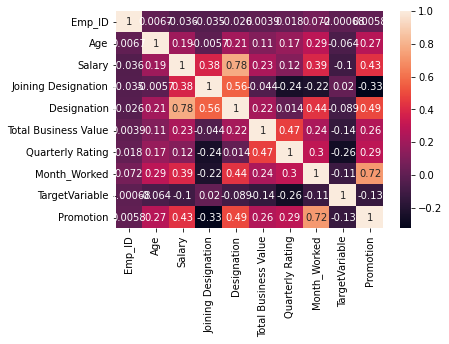

In [ ]:
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                2381 non-null   int64 
 1   Age                   2381 non-null   int64 
 2   Gender                2381 non-null   object
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   object
 5   Salary                2381 non-null   int64 
 6   Joining Designation   2381 non-null   int64 
 7   Designation           2381 non-null   int64 
 8   Month_Worked          2381 non-null   int64 
 9   Total Business Value  2381 non-null   int64 
 10  TargetVariable        2381 non-null   int64 
 11  Promotion             2381 non-null   int64 
 12  QR1                   2381 non-null   uint8 
 13  QR2                   2381 non-null   uint8 
 14  QR3                   2381 non-null   uint8 
 15  QR4                   2381 non-null   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


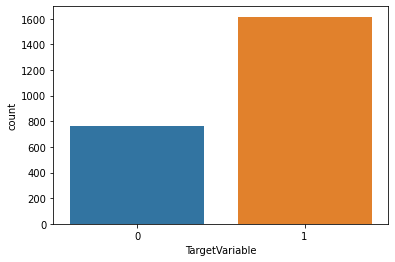

In [ ]:
sns.countplot('TargetVariable',data=train_final)
## We can Notice our data has more number of resigned employees. This gives good study to predict / retain employees 

                       TargetVariable
Gender TargetVariable                
Female 0                          309
       1                          668
Male   0                          456
       1                          948


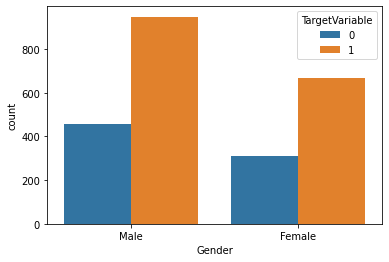

In [ ]:
#Bar Chart for Gender
resign_by_gender=pd.DataFrame(train_final.groupby(['Gender','TargetVariable'])['TargetVariable'].count())
print(resign_by_gender)
sns.countplot(x='Gender',hue='TargetVariable',data=train_final);
### More Male employees resigned. %wise resignation is same acorss  gender level 

                          TargetVariable
Promotion TargetVariable                
0         0                          578
          1                         1395
1         0                          187
          1                          221


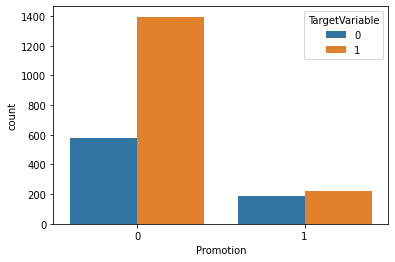

In [ ]:
#Bar Chart for promotion
resign_by_promotion=pd.DataFrame(train_final.groupby(['Promotion','TargetVariable'])['TargetVariable'].count())
print(resign_by_promotion)
sns.countplot(x='Promotion',hue='TargetVariable',data=train_final);
#### this gives clear picture that employee didn't get promotion resigned. Resignation is very less at promoted employees.

                                TargetVariable
Education_Level TargetVariable                
Bachelor        0                          268
                1                          527
College         0                          242
                1                          542
Master          0                          255
                1                          547


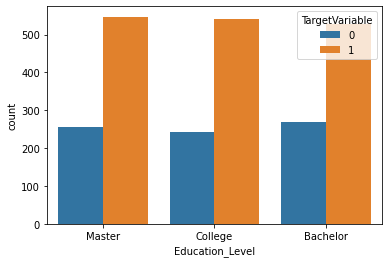

In [ ]:
#Bar Chart for Education level
resign_by_Education_Level=pd.DataFrame(train_final.groupby(['Education_Level','TargetVariable'])['TargetVariable'].count())
print(resign_by_Education_Level)
sns.countplot(x='Education_Level',hue='TargetVariable',data=train_final);
#### Attrition is constant across education level

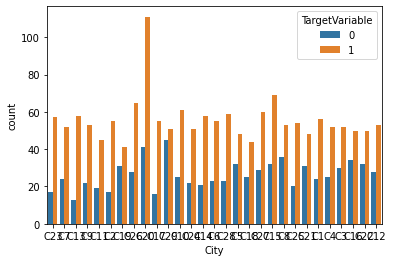

In [ ]:
#Bar Chart for City
resign_at_City_of_Work=pd.DataFrame(train_final.groupby(['City','TargetVariable'])['TargetVariable'].count())
#print(resign_at_City_of_Work)
sns.countplot(x='City',hue='TargetVariable',data=train_final);
#### Attrition is constant across City

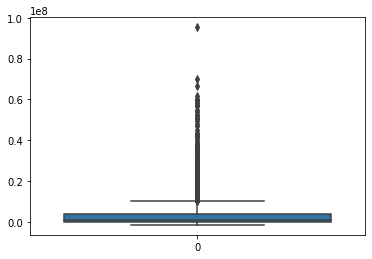

In [ ]:
### Box Plot for depth 
sns.boxplot(data=train_final['Total Business Value'])
plt.show()

In [ ]:
train_final.isnull().sum().sum()

0

In [ ]:
train_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train_final['Total Business Value']=train_final['Total Business Value'].fillna(0)

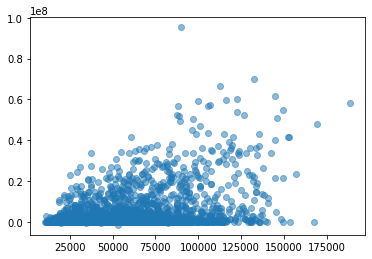

In [ ]:
# Understand Salary vs Business Value
# Scatter Plot - carat vs price
x=train_final.Salary
y=train_final['Total Business Value']
plt.scatter(x,y,alpha=0.5)
### Salary and Business value are related

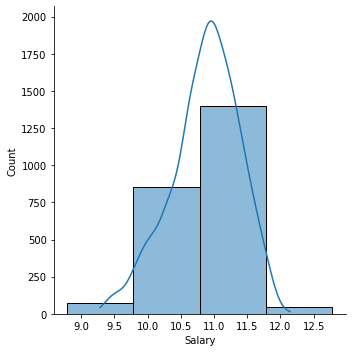

In [ ]:
#### Do log transformation for Salary
train_final["Salary"] = np.log(train_final["Salary"])
sns.displot(data=train_final,x='Salary',kde=True, discrete=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


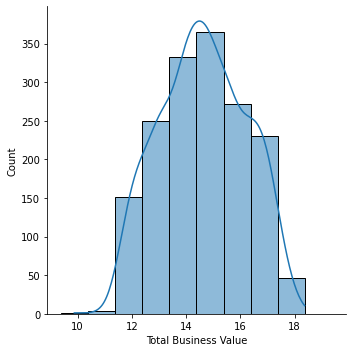

In [ ]:
#### Do log transformation for Total Business Value
train_final["Total Business Value"] = np.log(train_final["Total Business Value"])
sns.displot(data=train_final,x='Total Business Value',kde=True, discrete=True)
plt.show()

In [ ]:
train_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
train_final.isnull().sum().sum()

719

In [ ]:
train_final['Total Business Value']=train_final['Total Business Value'].fillna(0)

In [ ]:
train_final.isnull().sum().sum()

0

# Feature Selection Technique

Pearson Correlation Coefficient test (For Continuous Variables) Each predictor variable compared with target variable price and correlation value above 0.5 will be selected as significant features.

In [ ]:
train_final.columns

Index(['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Salary',
       'Joining Designation', 'Designation', 'Month_Worked',
       'Total Business Value', 'TargetVariable', 'Promotion', 'QR1', 'QR2',
       'QR3', 'QR4'],
      dtype='object')

In [ ]:
train_final.isnull().sum().sum()

0

In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Age                   2381 non-null   int64  
 2   Gender                2381 non-null   object 
 3   City                  2381 non-null   object 
 4   Education_Level       2381 non-null   object 
 5   Salary                2381 non-null   float64
 6   Joining Designation   2381 non-null   int64  
 7   Designation           2381 non-null   int64  
 8   Month_Worked          2381 non-null   int64  
 9   Total Business Value  2381 non-null   float64
 10  TargetVariable        2381 non-null   int64  
 11  Promotion             2381 non-null   int64  
 12  QR1                   2381 non-null   uint8  
 13  QR2                   2381 non-null   uint8  
 14  QR3                   2381 non-null   uint8  
 15  QR4                  

In [ ]:
Continuousdata=['TargetVariable','Age','Salary','Joining Designation','Designation','Month_Worked','Total Business Value', 'Promotion','QR1','QR2','QR3','QR4']
# Create Correlation matrix
Correlationdata = train_final[Continuousdata].corr()
Correlationdata

,TargetVariable,Age,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,Promotion,QR1,QR2,QR3,QR4
TargetVariable,1.000000,-0.078883,-0.199734,-0.127773,-0.226190,-0.181292,-0.191333,-0.133451,0.250949,-0.253389,-0.350210,-0.303652
Age,-0.078883,1.000000,0.205555,0.081523,0.252479,0.316229,0.208801,0.263718,-0.044661,0.252157,0.224254,0.165797
Salary,-0.199734,0.205555,1.000000,0.479240,0.692211,0.285312,0.169771,0.318969,0.042114,0.185197,0.148571,0.146773
Joining Designation,-0.127773,0.081523,0.479240,1.000000,0.712419,-0.217852,-0.127319,-0.268500,0.180536,-0.157040,-0.201951,-0.149059
Designation,-0.226190,0.252479,0.692211,0.712419,1.000000,0.335902,0.128151,0.406542,0.135674,0.186112,0.103229,0.116931
Month_Worked,-0.181292,0.316229,0.285312,-0.217852,0.335902,1.000000,0.487911,0.751521,-0.003978,0.604643,0.600209,0.338699
Total Business Value,-0.191333,0.208801,0.169771,-0.127319,0.128151,0.487911,1.000000,0.364197,0.028940,0.510556,0.419317,0.311060
Promotion,-0.133451,0.263718,0.318969,-0.268500,0.406542,0.751521,0.364197,1.000000,-0.056580,0.449472,0.429568,0.367019
QR1,0.250949,-0.044661,0.042114,0.180536,0.135674,-0.003978,0.028940,-0.056580,1.000000,-0.175704,-0.284292,-0.241885
QR2,-0.253389,0.252157,0.185197,-0.157040,0.186112,0.604643,0.510556,0.449472,-0.175704,1.000000,0.349772,0.139427


In [ ]:
Correlationdata['TargetVariable'][abs(Correlationdata['TargetVariable']) > 0.1 ]
#### This shows all Continuous variables are -ve correlated with resignation

TargetVariable          1.000000
Salary                 -0.199734
Joining Designation    -0.127773
Designation            -0.226190
Month_Worked           -0.181292
Total Business Value   -0.191333
Promotion              -0.133451
QR1                     0.250949
QR2                    -0.253389
QR3                    -0.350210
QR4                    -0.303652
Name: TargetVariable, dtype: float64

In [ ]:
### # Label Encoded
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
train_final['Gender'] = label_encoding.fit_transform(train_final['Gender'].astype(str))
train_final['City'] = label_encoding.fit_transform(train_final['City'].astype(str))
train_final['Education_Level'] = label_encoding.fit_transform(train_final['Education_Level'].astype(str))


# Test - Train Split

In [ ]:
train_final.head(3)

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,TargetVariable,Promotion,QR1,QR2,QR3,QR4
0,1,28,1,15,2,10.957573,1,1,3,14.355262,1,0,0,3,0,0
1,2,31,1,26,2,11.112687,2,2,1,0.000000,0,0,2,0,0,0
2,4,43,1,4,2,11.091377,2,2,4,12.765688,1,0,5,0,0,0


In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Age                   2381 non-null   int64  
 2   Gender                2381 non-null   int64  
 3   City                  2381 non-null   int64  
 4   Education_Level       2381 non-null   int64  
 5   Salary                2381 non-null   float64
 6   Joining Designation   2381 non-null   int64  
 7   Designation           2381 non-null   int64  
 8   Month_Worked          2381 non-null   int64  
 9   Total Business Value  2381 non-null   float64
 10  TargetVariable        2381 non-null   int64  
 11  Promotion             2381 non-null   int64  
 12  QR1                   2381 non-null   uint8  
 13  QR2                   2381 non-null   uint8  
 14  QR3                   2381 non-null   uint8  
 15  QR4                  

In [ ]:
##### use pandas merge and split test data details from train set 
test_final = test_data.merge(train_final,on='Emp_ID')

In [ ]:
test_final.duplicated().sum()

0

In [ ]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                2381 non-null   int64  
 1   Age                   2381 non-null   int64  
 2   Gender                2381 non-null   int64  
 3   City                  2381 non-null   int64  
 4   Education_Level       2381 non-null   int64  
 5   Salary                2381 non-null   float64
 6   Joining Designation   2381 non-null   int64  
 7   Designation           2381 non-null   int64  
 8   Month_Worked          2381 non-null   int64  
 9   Total Business Value  2381 non-null   float64
 10  TargetVariable        2381 non-null   int64  
 11  Promotion             2381 non-null   int64  
 12  QR1                   2381 non-null   uint8  
 13  QR2                   2381 non-null   uint8  
 14  QR3                   2381 non-null   uint8  
 15  QR4                  

In [ ]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Emp_ID                741 non-null    int64  
 1   Age                   741 non-null    int64  
 2   Gender                741 non-null    int64  
 3   City                  741 non-null    int64  
 4   Education_Level       741 non-null    int64  
 5   Salary                741 non-null    float64
 6   Joining Designation   741 non-null    int64  
 7   Designation           741 non-null    int64  
 8   Month_Worked          741 non-null    int64  
 9   Total Business Value  741 non-null    float64
 10  TargetVariable        741 non-null    int64  
 11  Promotion             741 non-null    int64  
 12  QR1                   741 non-null    uint8  
 13  QR2                   741 non-null    uint8  
 14  QR3                   741 non-null    uint8  
 15  QR4                   7

In [ ]:
#train_final.drop(['Total Business Value'],axis=1,inplace=True)
#test_final.drop(['Total Business Value'],axis=1,inplace=True)

In [ ]:
train_final.drop(['Emp_ID'],axis=1,inplace=True)
test_final.drop(['Emp_ID'],axis=1,inplace=True)

In [ ]:
# Run a Model to select significant variables
#### Set Y and X variables
y_train = train_final['TargetVariable']
X_train = train_final
X_test  = test_final

In [ ]:
X_train.drop(['TargetVariable'],axis=1,inplace=True)
X_test.drop(['TargetVariable'],axis=1,inplace=True)


In [ ]:
X_train.head(2)

,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Month_Worked,Total Business Value,Promotion,QR1,QR2,QR3,QR4
0,28,1,15,2,10.957573,1,1,3,14.355262,0,0,3,0,0
1,31,1,26,2,11.112687,2,2,1,0.000000,0,2,0,0,0


In [ ]:
X_test.duplicated().sum()

0

In [ ]:
y_train.head(2)

0    1
1    0
Name: TargetVariable, dtype: int64

In [ ]:
#### Split Data into Train and Test Models
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,
#                                                 Y,
#                                                 test_size = 0.3, 
#                                                 random_state = 31)

In [ ]:
#2 . Technique 2 -  Information Gain (Mutual Information) 
## Measure Presence or absence of a feature contributes to making correct prediction of Target Variable

# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 8

# get only the numerical features.
numerical_x_train = X_train[X_train.select_dtypes([np.number]).columns]


# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train)

# display the retained features.
mutualinformation_features = X_train.columns[selection.get_support()]


In [ ]:
#3. Technique 3 - Chi-Squared Score - Mainly suited for categorical variables
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 8

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# display the k selected features.
chiSquared_features = X_train.columns[selection.get_support()]

In [ ]:
# display the k selected features.
combined_features = list(X_train.columns)
combined_features.remove('Gender')
combined_features.remove('City')
combined_features.remove('Education_Level')




In [ ]:
print('mutualinformation_features : ')
print(mutualinformation_features)
print('chiSquared_features        : ')
print(chiSquared_features)
print('combined_features        : ')
combined_features


mutualinformation_features : 
Index(['Designation', 'Month_Worked', 'Total Business Value', 'Promotion',
       'QR1', 'QR2', 'QR3', 'QR4'],
      dtype='object')
chiSquared_features        : 
Index(['Designation', 'Month_Worked', 'Total Business Value', 'Promotion',
       'QR1', 'QR2', 'QR3', 'QR4'],
      dtype='object')
combined_features        : 


['Age',
 'Salary',
 'Joining Designation',
 'Designation',
 'Month_Worked',
 'Total Business Value',
 'Promotion',
 'QR1',
 'QR2',
 'QR3',
 'QR4']

# ML Models

In [ ]:
### LDA classifier
combined_logit=LinearDiscriminantAnalysis(solver='svd')
combined_logit.fit(X_train[combined_features],y_train)
### Print Model Summary
#combined_logit.summary2()

### Predicting on Test Data
###  predict
y_pred = combined_logit.predict(X_test[combined_features])  
y_pred_train = combined_logit.predict(X_train[combined_features])

y_pred_df = pd.DataFrame({"actual":y_pred})


In [ ]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [ ]:
### SGD Classifier
combined_logit=SGDClassifier(max_iter=10000,tol=0.001)
combined_logit.fit(X_train[combined_features],y_train)
### Print Model Summary
#combined_logit.summary2()

### Predicting on Test Data
###  predict
y_pred = combined_logit.predict(X_test[combined_features])  
y_pred_train = combined_logit.predict(X_train[combined_features])

y_pred_df = pd.DataFrame({"actual":y_pred})




In [ ]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [ ]:
from google.colab import drive
import csv
drive.mount('/gdrive',force_remount=True)
y_pred_df.to_csv('/gdrive/My Drive/hackathon1120_comb.csv')

Mounted at /gdrive


In [ ]:
### Build Logistic Regression Model
combined_logit=LogisticRegression(solver='liblinear')
combined_logit.fit(X_train[combined_features],y_train)
### Print Model Summary
#combined_logit.summary2()

### Predicting on Test Data
###  predict
y_pred = combined_logit.predict(X_test[combined_features])  
y_pred_train = combined_logit.predict(X_train[combined_features])

y_pred_df = pd.DataFrame({"actual":y_pred})





In [ ]:
from google.colab import drive
import csv
drive.mount('/gdrive',force_remount=True)
y_pred_df.to_csv('/gdrive/My Drive/hackathon1120_comb.csv')

Mounted at /gdrive


In [ ]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [ ]:
from google.colab import drive
import csv
drive.mount('/gdrive',force_remount=True)
y_pred_df.to_csv('/gdrive/My Drive/hackathon1120_comb.csv')

Mounted at /gdrive


In [ ]:
### Build SVM Model
combined_logit=model=LinearSVC(C=1.0,max_iter=1000,tol=0.001,dual=False)
combined_logit.fit(X_train[combined_features],y_train)


### Predicting on Test Data
###  predict
y_pred = combined_logit.predict(X_test[combined_features])  
y_pred_train = combined_logit.predict(X_train[combined_features])

y_pred_df = pd.DataFrame({"actual":y_pred})

In [ ]:
y_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   actual  741 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


In [ ]:
from google.colab import drive
import csv
drive.mount('/gdrive',force_remount=True)
y_pred_df.to_csv('/gdrive/My Drive/hackathon1120_comb.csv')

Mounted at /gdrive
